# Использование `K-means` для сжатия


Еще одно полезное применение кластеризации — сжатие изображений. Схема до удивления проста: похожие, рядом расположенные цвета, стоит объединить в один цвет. Давайте провернем это самостоятельно.

Считайте изображение из вашего индивидуального задания.

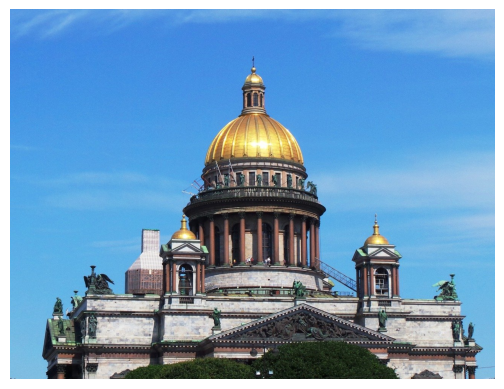

In [39]:
import matplotlib.pyplot as plt
import cv2
import numpy as np


# Путь к изображению
img_path = 'DATA/spb_st_isaacs_2.jpg'

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)

Перед нами трехканальное (RGB) изображение. Вычислите среднее значение интенсивности пикселей по всем каналам.

In [40]:
np.mean(img)

140.9997785391052

Нормируйте значения интенсивностей пикселей, разделив все значения на $255$. Вычислите среднее значение интенсивности пикселей по всем каналам после проделанного преобразования.

In [41]:
img = img/255
img

array([[[0.34117647, 0.60392157, 0.88235294],
        [0.3372549 , 0.6       , 0.87843137],
        [0.33333333, 0.59607843, 0.8745098 ],
        ...,
        [0.6       , 0.7372549 , 0.90196078],
        [0.6       , 0.7372549 , 0.90196078],
        [0.59607843, 0.73333333, 0.89803922]],

       [[0.33333333, 0.59607843, 0.8745098 ],
        [0.32941176, 0.59215686, 0.87058824],
        [0.32941176, 0.59215686, 0.87058824],
        ...,
        [0.6       , 0.7372549 , 0.90196078],
        [0.6       , 0.7372549 , 0.90196078],
        [0.59607843, 0.73333333, 0.89803922]],

       [[0.32941176, 0.59607843, 0.8745098 ],
        [0.33333333, 0.6       , 0.87843137],
        [0.3372549 , 0.60392157, 0.88235294],
        ...,
        [0.6       , 0.74509804, 0.90980392],
        [0.59607843, 0.74117647, 0.90588235],
        [0.58823529, 0.73333333, 0.89803922]],

       ...,

       [[0.50980392, 0.63921569, 0.76078431],
        [0.67843137, 0.81568627, 0.93333333],
        [0.57647059, 0

In [42]:
np.mean(img)

0.552940307996491

Давайте убедимся в том, что исходное пространство цветов, насчитывающее около $16$ миллионов возможных состояний ($256^3$), слишком велико, и его размерность можно понижать. Для наглядности построим лишь некоторые подвыборки зависимостей значений интенсивностей и лишь на случайном поднаборе пикселей.

«Распрямите» изображение так, чтобы <code>.shape</code> соответствущего массива имел вид <code>(высота * ширина, 3)</code>

In [43]:
# Функция принимает на вход "распрямленный" массив, соответствующий изображению

def plot_pixels(data, colors=None, N=10000):
    if colors is None:
        colors = data

    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

In [44]:
img.shape[0]

976

In [45]:
img.reshape(img.shape[0]*img.shape[1], img.shape[2]).shape

(1249280, 3)

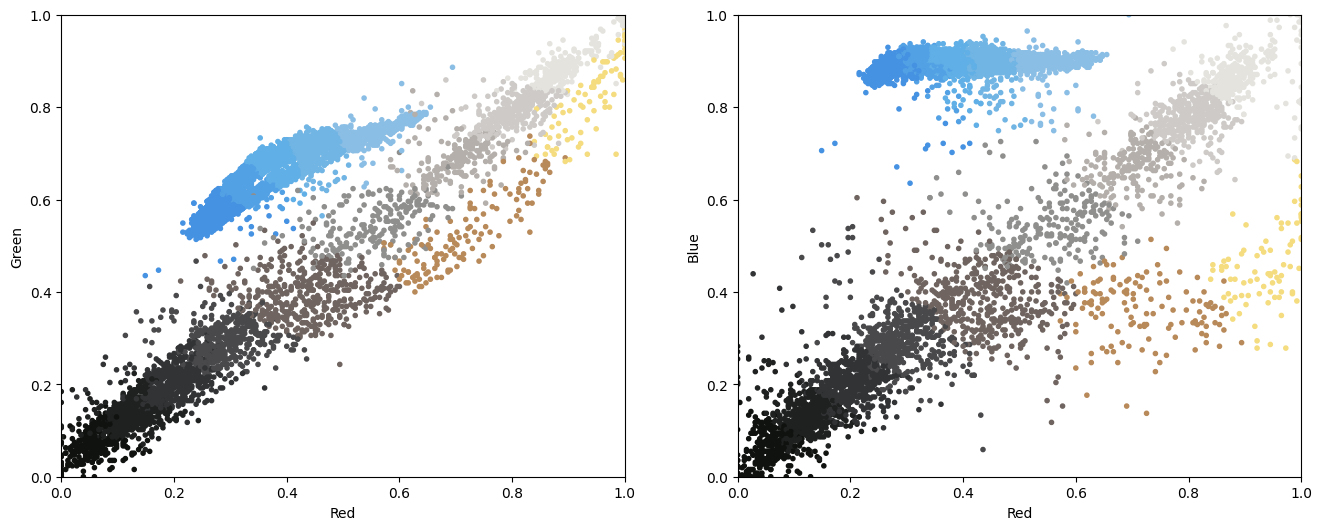

In [60]:
plot_pixels(img.reshape(img.shape[0]*img.shape[1], img.shape[2]), colors=np.reshape(new_img, (1249280, 3)))

Переведем 16 миллионов возможностей во всего-навсего 16 возможностей, используя <code>K-means</code>. Правда, чтобы ускорить работу алгоритма, мы будем использовать <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html"><code>K-means</code> на батчах</a> — поднаборах данных. Заодно увидим, портит ли это результат.

Обучите модель <code>MiniBatchKMeans</code> на нормированном и «распрямленном» изображении с параметрами, указанными в вашем задании.

В изображении замените значения цветов каждого пикселя на значения координат центроида кластера к которому был отнесен этот пиксель. Постройте графики зависимостей цветов при помощи <code>plot_pixels()</code> с новой палитрой (параметр <code>colors</code>)


In [47]:
from sklearn.cluster import MiniBatchKMeans

In [48]:
model_norm = MiniBatchKMeans(n_clusters=16, random_state=10).fit(img.reshape(img.shape[0]*img.shape[1], img.shape[2]))

/Users/grigoriiott/anaconda3/envs/tensor/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


In [49]:
model_norm.cluster_centers_

array([[0.27358436, 0.57347591, 0.88674735],
       [0.11856812, 0.12942872, 0.12344465],
       [0.80288731, 0.79387201, 0.78065934],
       [0.43662497, 0.39060421, 0.37429687],
       [0.32402721, 0.63326312, 0.89970342],
       [0.28735681, 0.28730058, 0.29553026],
       [0.89556969, 0.88848967, 0.86956015],
       [0.55926333, 0.55939161, 0.55623969],
       [0.05928935, 0.07112989, 0.05762106],
       [0.54537126, 0.74493732, 0.89949641],
       [0.95707358, 0.86291377, 0.49825005],
       [0.37824031, 0.68698186, 0.90057048],
       [0.19245113, 0.19953157, 0.20630574],
       [0.72002614, 0.53560784, 0.35069281],
       [0.7068401 , 0.68737462, 0.66810328],
       [0.4441272 , 0.70954291, 0.89560733]])

In [50]:
clusters = model_norm.cluster_centers_

In [51]:
reshaped_img = img.reshape(img.shape[0]*img.shape[1], img.shape[2])

In [52]:
reshaped_img[0].reshape(1, -1)

array([[0.34117647, 0.60392157, 0.88235294]])

In [53]:
new_img = []
for pixel in reshaped_img:
    cls = model_norm.predict(pixel.reshape(1, -1))
    new_img.append(clusters[cls])

Вычислите среднее значение интенсивности пикселей полученного изображения.

In [61]:
np.mean(np.reshape(new_img, (1249280, 3)))

0.5535525514224224

Выберите номер изображения, соответствующего палитре из $16$ цветов.

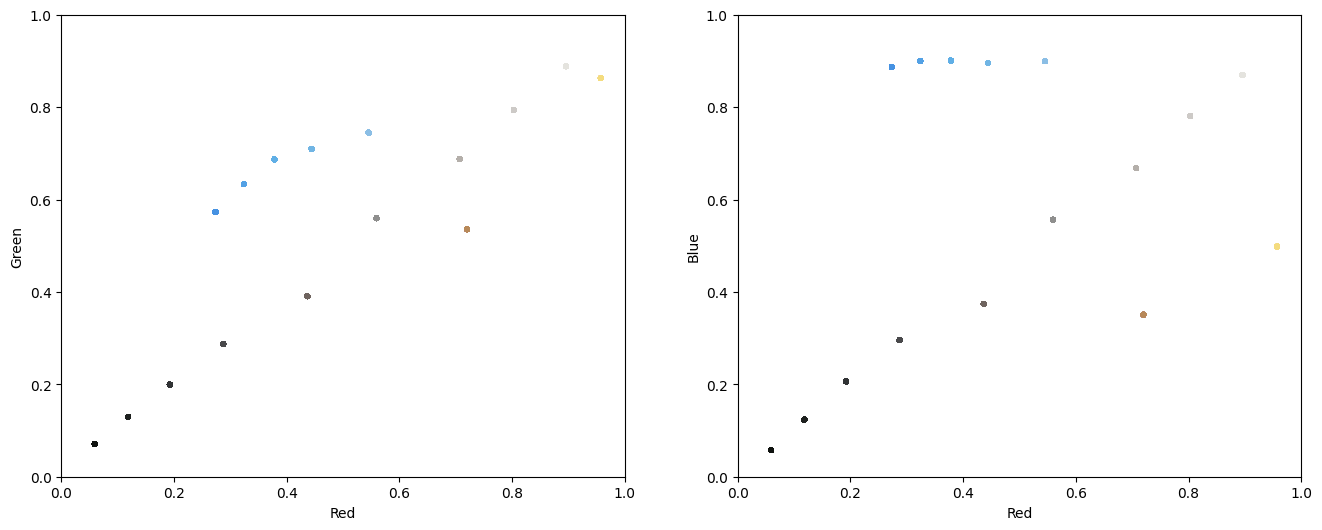

In [59]:
plot_pixels(np.reshape(new_img, (1249280, 3)))

Пора смотреть на результат! Постройте рядом оригинальное изображение и изображение, в котором используется лишь $16$ цветов.

In [34]:
reshaped_img

array([[0.34117647, 0.60392157, 0.88235294],
       [0.3372549 , 0.6       , 0.87843137],
       [0.33333333, 0.59607843, 0.8745098 ],
       ...,
       [0.33333333, 0.41568627, 0.52156863],
       [0.42352941, 0.50196078, 0.6       ],
       [0.42352941, 0.49019608, 0.59215686]])

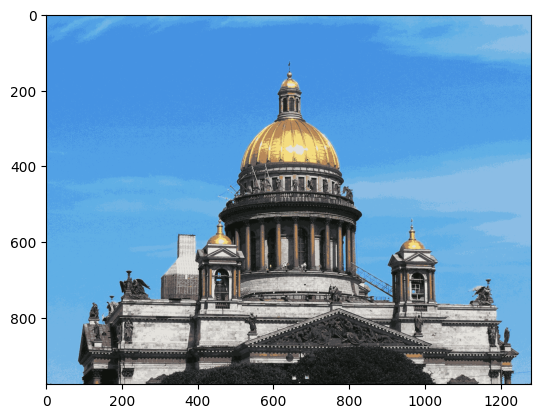

In [65]:
plt.imshow(np.reshape(new_img, img.shape))

In [55]:
img.shape

(976, 1280, 3)

Постройте изображение размера $4 \times 4$ на основе полученных $16$ цветов. Выберите верное изображение.

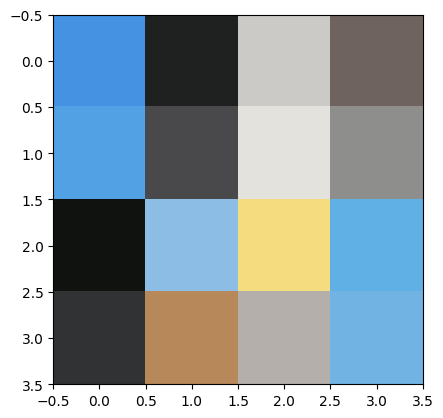

In [64]:
plt.imshow(clusters.reshape(4, 4, 3))

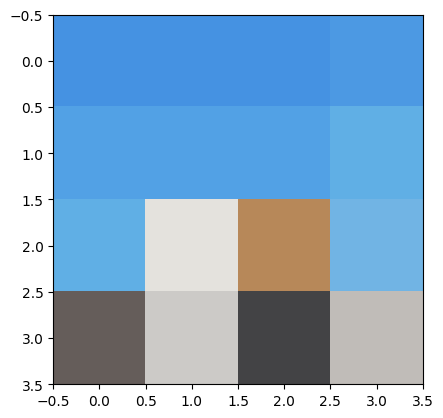

In [67]:
plt.imshow((cv2.resize(np.reshape(new_img, img.shape), 
           (4, 4))))